In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Youssef\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PCA function

In [2]:
# https://www.askpython.com/python/examples/principal-component-analysis

def PCA(X , num_components):
     
    # 1. Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)
     
    # 2. Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    # 3. Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    # 4. Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    # 5. Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components] #you can select any number of components.
     
    # 6. Transform the data
    X_after_PCA = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_after_PCA

In [3]:
from sklearn.datasets import load_iris

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = data.drop( 'target' , axis=1)
# print(X.columns)
y = data.target 

X_pca = PCA(X , 2)
 
    
new_pca_df = pd.DataFrame(X_pca , columns = ['PC1','PC2'])
 
    
new_pca_df = pd.concat([new_pca_df , pd.DataFrame(data['target'])] , axis = 1)

In [6]:
X_pca

array([[ 2.68420713,  0.32660731],
       [ 2.71539062, -0.16955685],
       [ 2.88981954, -0.13734561],
       [ 2.7464372 , -0.31112432],
       [ 2.72859298,  0.33392456],
       [ 2.27989736,  0.74778271],
       [ 2.82089068, -0.08210451],
       [ 2.62648199,  0.17040535],
       [ 2.88795857, -0.57079803],
       [ 2.67384469, -0.1066917 ],
       [ 2.50652679,  0.65193501],
       [ 2.61314272,  0.02152063],
       [ 2.78743398, -0.22774019],
       [ 3.22520045, -0.50327991],
       [ 2.64354322,  1.1861949 ],
       [ 2.38386932,  1.34475434],
       [ 2.6225262 ,  0.81808967],
       [ 2.64832273,  0.31913667],
       [ 2.19907796,  0.87924409],
       [ 2.58734619,  0.52047364],
       [ 2.3105317 ,  0.39786782],
       [ 2.54323491,  0.44003175],
       [ 3.21585769,  0.14161557],
       [ 2.30312854,  0.10552268],
       [ 2.35617109, -0.03120959],
       [ 2.50791723, -0.13905634],
       [ 2.469056  ,  0.13788731],
       [ 2.56239095,  0.37468456],
       [ 2.63982127,

In [7]:
new_pca_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


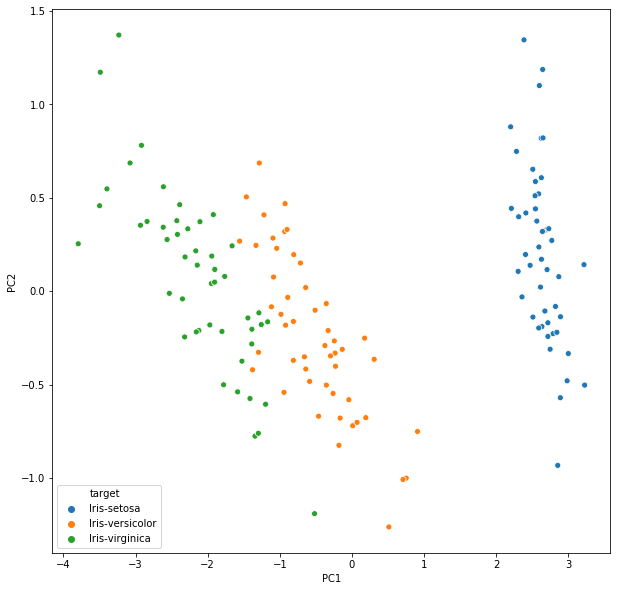

In [8]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = new_pca_df , x = 'PC1',y = 'PC2' , hue = 'target' )